<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2022 </h2></center> 
<center><h3> Lab 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka 2</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 2.6 MB/s            
     |████████████████████████████████| 9.5 MB 34.1 MB/s            
     |████████████████████████████████| 25.9 MB 58.8 MB/s                     | 12.7 MB 58.8 MB/s eta 0:00:01MB/s eta 0:00:01:00:01��███▋   | 23.1 MB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 65.9 MB/s                               | 286 kB 65.9 MB/s eta 0:00:01��███          | 10.2 MB 65.9 MB/s eta 0:00:01ta 0:00:01
     |████████████████████████████████| 11.5 MB 50.6 MB/s                                    | 286 kB 50.6 MB/s eta 0:00:01                 | 3.6 MB 50.6 MB/s eta 0:00:01    | 7.9 MB 50.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 59.1 MB/s            
     |████████████████████████████████| 3.1 MB 48.4 MB/s             MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 78.6 MB/s            
  Conside

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, re
import seaborn as sns

episodes = pd.read_csv('simpsons_episodes.csv')

In [2]:
# extract some datetime variables
episodes['datetime'] = pd.to_datetime(episodes['original_air_date'])
episodes['datetime_year'] = episodes['datetime'].dt.year
episodes['datetime_month'] =episodes['datetime'].dt.month
episodes['datetime_day'] =episodes['datetime'].dt.day
episodes['datetime-MM-DD'] = episodes['datetime'].dt.strftime('%m-%d')

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *title*: Episode title
- *original_air_date*
- *production_code*
- *season*
- *number_in_season*
- *number_in_series*
- *us_viewers_in_millions*
- *views*
- *imdb_rating*
- *imdb_votes*
- *image_url*
- *video_url*

## Vizualizacija dviju kontinuiranih varijabli

- Je li se smanjivao IMDB rating i US views kroz godine
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

Text(0, 0.5, 'IMDB rating')

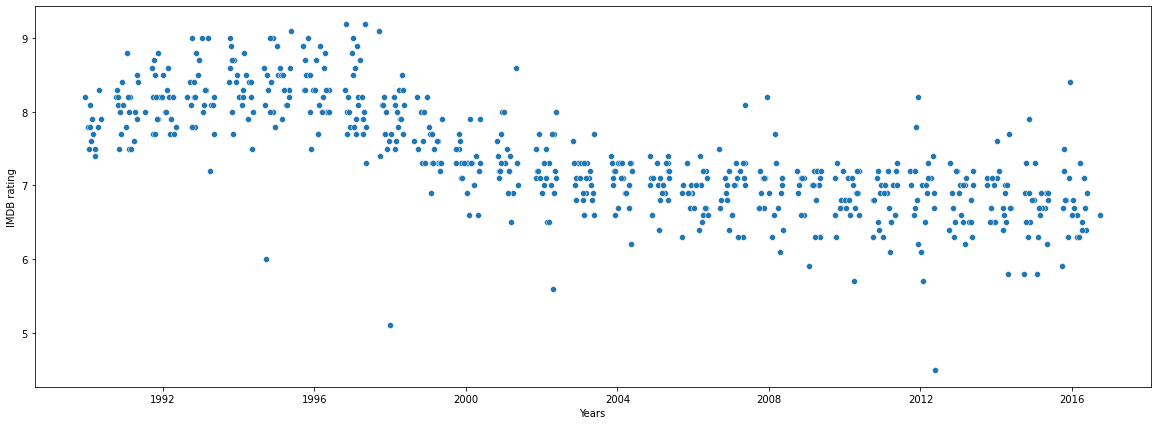

In [6]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=episodes, x="datetime", y="imdb_rating")
plt.xlabel("Years")
plt.ylabel("IMDB rating")

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo IMDB rating i US views kroz godine i sezone emitiranja
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

<AxesSubplot:xlabel='datetime_year', ylabel='imdb_rating'>

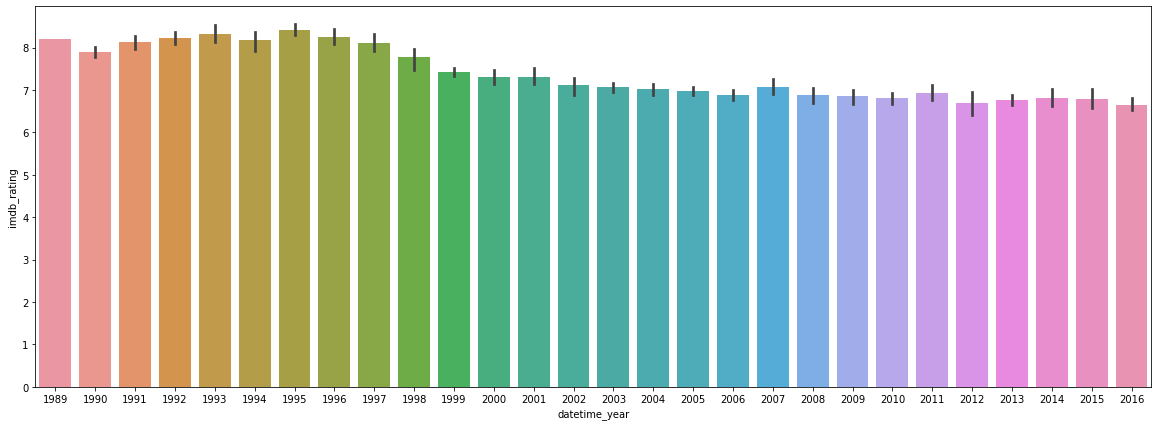

In [13]:
# barplot
plt.figure(figsize=(20,7))
sns.barplot(data=episodes, x="datetime_year", y="imdb_rating")

<AxesSubplot:xlabel='datetime_year', ylabel='imdb_rating'>

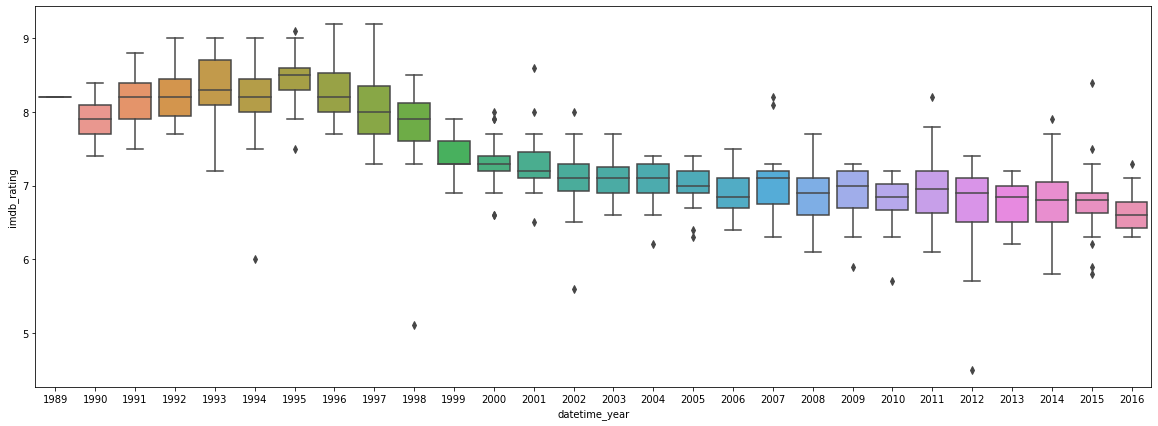

In [12]:
# boxplot
plt.figure(figsize=(20,7))
sns.boxplot(data=episodes, x="datetime_year", y="imdb_rating")

<AxesSubplot:xlabel='datetime_year', ylabel='imdb_rating'>

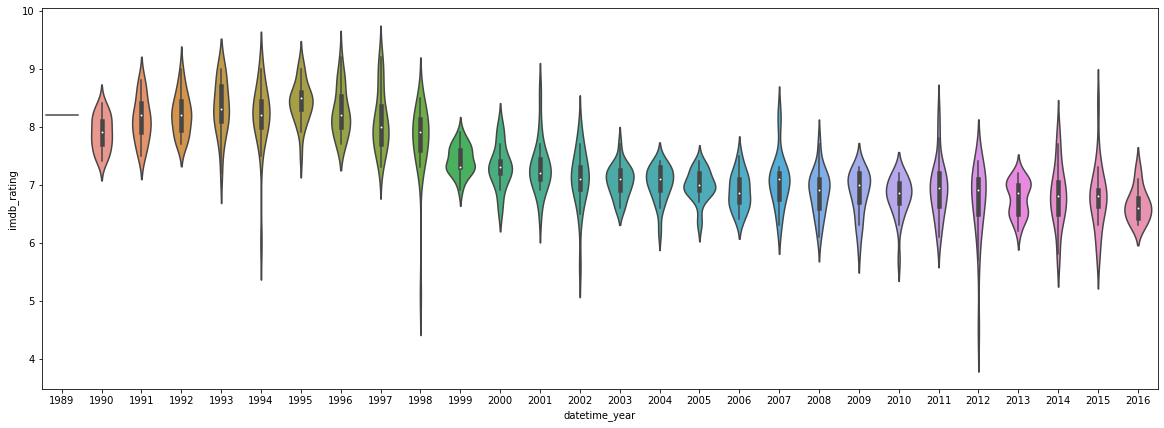

In [15]:
# violinplot
plt.figure(figsize=(20,7))
sns.violinplot(data=episodes, x="datetime_year", y="imdb_rating")

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedećoj vježbi dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Heatmape

- Vizualizirajte IMDB i US views kroz sezone te koristite funkciju Seaborn heatmap te funkciju *pivot* of pandasa

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokažite kako sa sezonom opada IMDB ocjena i US views korištenjem heatmape


<AxesSubplot:xlabel='season', ylabel='number_in_season'>

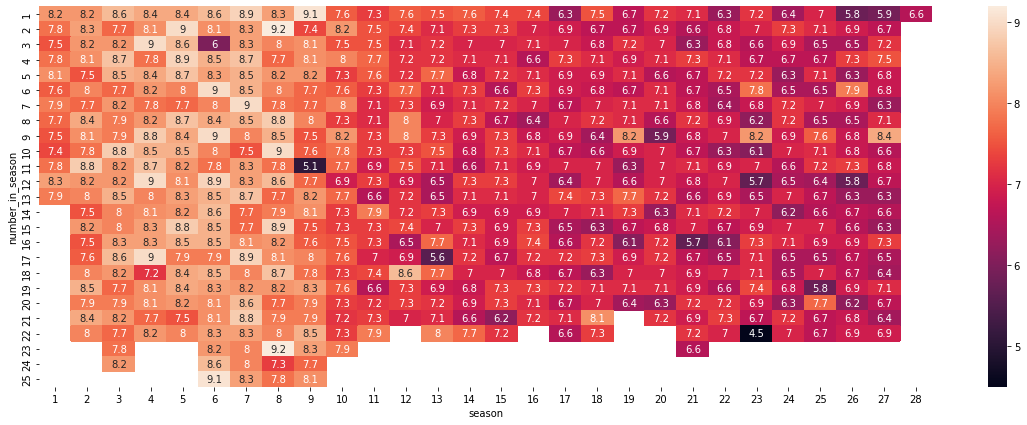

In [24]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu
plt.figure(figsize=(20,7))
dataToDisplay = episodes[["number_in_season", "season", "imdb_rating"]]
heatMap = dataToDisplay.pivot("number_in_season", "season", "imdb_rating");
sns.heatmap(heatMap, annot=True)
#sns.heatmap(pd.crosstab(episodes["datetime_year"], episodes["imdb_rating"]), annot=True)

<AxesSubplot:xlabel='season', ylabel='number_in_season'>

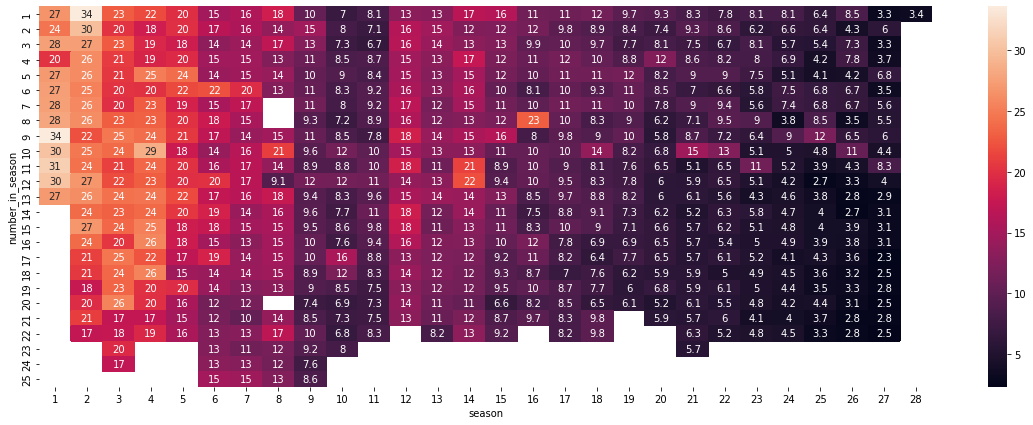

In [27]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu
plt.figure(figsize=(20,7))
dataToDisplay = episodes[["number_in_season", "season", "us_viewers_in_millions"]]
heatMap = dataToDisplay.pivot("number_in_season", "season", "us_viewers_in_millions");
sns.heatmap(heatMap, annot=True)